# NumPy: The Basics

## The Simple Stuff

Start by importing the NumPy module

In [1]:
import numpy as np

Then create an `np.ndarray` object (which we will refer to as *array* objects from now on)

In [2]:
arr_0 = np.array(object = [11,22,33,44,55], dtype = np.int64)

The above represents the row-vector $\begin{bmatrix} 11 & 22 & 33 & 44 & 55 \end{bmatrix}$.

Generally, the `object` parameter should be a regularly-shaped list, tuple, or array; `dtype` is optional, and determines what *type* of elements the array contains.

To access elements of an array, we can use indexing.  Element $22$ is the second element of `arr_0`, so we can access it with index `1`:

In [3]:
print(arr_0[1])

22


Negative indices are supported, and count down from the *last* element in the array, implying that index `-1` should return `55`, while `-2` yields `44`, and so on.

In [4]:
print(arr_0[-1])
print(arr_0[-2])

55
44


We can access multiple elements by passing a *list* of indices, rather than a single integer index, to the array.  We can for example extract the array $\begin{bmatrix} 11 & 33 & 44 \end{bmatrix}$:

In [5]:
print(arr_0[[0,2,3]])

[11 33 44]


## Slices

We can also use `slice` objects to extract uniformly-spaced sequences of elements.  First, let's use NumPy's `arange` function to create an array containing all integers from zero to fifty:

In [6]:
start, stop, step = 0, 51, 1
arr_1 = np.arange(start, stop, step)

`slice` objects also accept a *start*, *stop*, and *step* argument.  Such objects can also be passed in lieu of an integer; let's extract every other element of `arr_1` in this way:

In [7]:
start, stop, step = 0, 51, 2
s = slice(start, stop, step)
print(arr_1[s])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50]


We can use slices in a more compact way with `start:stop:step` notation:

In [8]:
print(arr_1[0:51:2])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46
 48 50]


In addition to this, one may also omit indices between the colons; leaving the `start` argument blank sets it to `0`, while leaving the `stop` argument blank essentially sets it to `-1`.  The `step` argument has a default value of `1`.

In [9]:
print(arr_1[::])

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]


We can also traverse backwards through arrays by setting the `step` argument to be a negative number:

In [10]:
print(arr_1[::-1])

[50 49 48 47 46 45 44 43 42 41 40 39 38 37 36 35 34 33 32 31 30 29 28 27
 26 25 24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5  4  3
  2  1  0]


## 2-D Arrays

Nested lists can be used to generate multidimensional arrays – to keep things simple, here we have a 2-D array:

In [11]:
arr_2 = np.array([[0,1,2,3,4],[5,6,7,8,9]])
print(arr_2)

[[0 1 2 3 4]
 [5 6 7 8 9]]


This can be represented by the matrix $\begin{bmatrix} 0 & 1 & 2 & 3 & 4 \\ 5 & 6 & 7 & 8 & 9 \end{bmatrix}$.

To extract single elements from multidimensional arrays, we use commas to pass indices/lists/slices for multiple axes.  For example, element $7$ is the third element of the second row, meaning that it exists at index `[1,2]` 

In [12]:
print(arr_2[1,2])

7


We can use slices to extract sections from our array, e.g $\begin{bmatrix} 0 & 1 \\ 5 & 6 \end{bmatrix}$

In [13]:
print(arr_2[:2:,:2:])

[[0 1]
 [5 6]]


These concepts extend to higher dimensions as well, simply add more commas and indices!  

Before moving on, we can use the `reshape` function to more efficiently create arrays like `arr_2`:

In [14]:
print(np.reshape(np.arange(0,10,1), (2,5)))

[[0 1 2 3 4]
 [5 6 7 8 9]]


Note that the first argument is reshapen into the dimensions given by the second argument.

## Arithmetic and Concatenation

In Python, we know that lists cannot be added to each other in the mathematical sense:

In [15]:
list_0 = [1,2,3]
list_1 = [4,5,6]
print(list_0 + list_1)

[1, 2, 3, 4, 5, 6]


Instead, the `+` operator is used to perform *concatenation*.  A loop is required to add these together:

In [16]:
total = []
for i,j in zip(list_0, list_1):
    total.append(i+j)
print(total)

[5, 7, 9]


This is cumbersome and slow.  Let's convert these to arrays, and try this again:

In [17]:
arr_3 = np.array(list_0)
arr_4 = np.array(list_1)
print(arr_3 + arr_4)    # Addition

[5 7 9]


Two of the advantages of using arrays is compact syntax, and speed.  We can perform several other mathematical operations in the same way:

In [18]:
print(arr_3 - arr_4)    # Subtraction
print(arr_3 * arr_4)    # Multiplication
print(arr_3 / arr_4)    # Division
print(arr_3 ** arr_4)   # Exponentiation
print(arr_3 // arr_4)   # Integer Division
print(arr_3 % arr_4)    # Modulo

[-3 -3 -3]
[ 4 10 18]
[0.25 0.4  0.5 ]
[  1  32 729]
[0 0 0]
[1 2 3]


However, it may also be useful to concatenate arrays; this is mainly accomplished using the `concatenate`, `hstack`, and `vstack` functions:

In [19]:
print(np.concatenate([arr_3, arr_4]))
print(np.hstack([arr_3, arr_4]))
print(np.vstack([arr_3, arr_4]))

[1 2 3 4 5 6]
[1 2 3 4 5 6]
[[1 2 3]
 [4 5 6]]


When concatenating multidimensional arrays, it might be necessary to specify an `axis` upon which to concatenate.

It is also possible to operate between scalars and arrays, such as in the following example:

In [20]:
print(arr_3+2)
print(arr_3-2)
print(arr_3*2)
print(arr_3/2)
print(arr_3**2)
print(arr_3//2)
print(arr_3%2)

[3 4 5]
[-1  0  1]
[2 4 6]
[0.5 1.  1.5]
[1 4 9]
[0 1 1]
[1 0 1]


# Linear Algebra

NumPy is excellent for linear algebra problems, and contains many useful tools that perform commonly used operations – we will go through them one at a time.

## Vector Operations
### Dot Product

In [21]:
np.dot(arr_3, arr_4)

32

### Inner Product

In [22]:
np.inner(arr_3, arr_4)

32

### Outer Product

In [23]:
np.outer(arr_3, arr_4)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

## Matrix Operations

Let's create two 2-D arrays, representing the matrices $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}$ and $\begin{bmatrix} 4 & 3 \\ 2 & 1 \end{bmatrix}$

In [24]:
arr_5 = np.array([[1,2],[3,4]])
arr_6 = np.array([[4,3],[2,1]])

print(arr_5)
print(arr_6)

[[1 2]
 [3 4]]
[[4 3]
 [2 1]]


### Dot Product
Note that this is equivalent to *matrix multiplication* in this case

In [25]:
np.dot(arr_5, arr_6)

array([[ 8,  5],
       [20, 13]])

### Inner Product

In [26]:
np.inner(arr_5, arr_6)

array([[10,  4],
       [24, 10]])

### Outer Product

In [27]:
np.outer(arr_5, arr_6)

array([[ 4,  3,  2,  1],
       [ 8,  6,  4,  2],
       [12,  9,  6,  3],
       [16, 12,  8,  4]])

### Matrix Multiplication

np.matmul(arr_5, arr_6)

### Eigenvalues/Eigenvectors for Square Arrays

In [28]:
eigenvalues, eigenvectors = np.linalg.eig(arr_5)
print(eigenvalues)
print(eigenvectors)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


### Eigenvalues for General Arrays

In [29]:
np.linalg.eigvals(arr_5)

array([-0.37228132,  5.37228132])

### Matrix Exponentiation

In [30]:
np.linalg.matrix_power(arr_5, 2)

array([[ 7, 10],
       [15, 22]])

### QR Factorization

In [31]:
Q,R = np.linalg.qr(arr_5)
print(Q)
print(R)

[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
[[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]]


### SVD Factorization

In [32]:
U,Sigma,V = np.linalg.svd(arr_5)
print(U)
print(Sigma)
print(V)

[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]
[5.4649857  0.36596619]
[[-0.57604844 -0.81741556]
 [ 0.81741556 -0.57604844]]


### L2 Norm

In [33]:
np.linalg.norm(arr_5)

5.477225575051661

### Determinant

In [34]:
np.linalg.det(arr_5)

-2.0000000000000004

### Solving for $x$ in $ax = b$

Where `arr_5` represents $a$ and `arr_6` represents $b$.

In [35]:
np.linalg.solve(arr_5, arr_6)

array([[-6., -5.],
       [ 5.,  4.]])

### Matrix Inverse

In [36]:
np.linalg.inv(arr_5)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

# Logic

## Element-Wise Comparators

### $a>b$

In [37]:
np.greater(arr_5, arr_6)

array([[False, False],
       [ True,  True]])

### $a < b$

In [38]:
np.less(arr_5, arr_6)

array([[ True,  True],
       [False, False]])

### $a \geq b$

In [39]:
np.greater_equal(arr_5, arr_6)

array([[False, False],
       [ True,  True]])

### $a \leq b$

In [40]:
np.less_equal(arr_5, arr_6)

array([[ True,  True],
       [False, False]])

### $a == b$

In [41]:
np.equal(arr_5, arr_6)

array([[False, False],
       [False, False]])

### $a \ != b$

In [42]:
np.not_equal(arr_5, arr_6)

array([[ True,  True],
       [ True,  True]])

## Array Equivalence

Using `array_equal(a,b)` returns True if a and b have the same shape and elements

In [43]:
np.array_equal(arr_5, arr_6)

False

Using `array_equiv(a,b)` returns `True` if `a` and `b` are *broadcastable*.

**Broadcasting**:
“Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes.”
 – https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html 

In [44]:
np.array_equiv(arr_5, arr_6)

False

# Statistics

### Mean

In [45]:
np.mean(arr_5)

2.5

To exclude `nan` values, use the following instead:

In [46]:
np.nanmean(arr_5)

2.5

### Standard Deviation

In [47]:
np.std(arr_5)

1.118033988749895

To exclude `nan` values, use the following instead:

In [48]:
np.nanstd(arr_5)

1.118033988749895

### Variance

In [49]:
np.var(arr_5)

1.25

To exclude `nan` values, use the following instead:

In [50]:
np.nanvar(arr_5)

1.25

# Random Number Generation

### Gaussian Distribution

Returns Gaussian distributed values with dimensions given by the function parameters.

In [51]:
np.random.randn(2,2,2)

array([[[ 0.83377069,  0.75822956],
        [-1.79578945, -0.93660944]],

       [[ 2.89227395, -0.61222542],
        [-0.47839662, -2.30924399]]])

Alternatively, one can use the Gaussian mean $\mu$ and standard deviation $\sigma$:

In [52]:
mu, sigma, shape = 0, 1, (2,2,2)
np.random.normal(mu, sigma, shape)

array([[[-1.22317829,  0.14614169],
        [-1.82910552,  0.77395156]],

       [[-0.17545727,  0.59889997],
        [-0.20495432,  0.38447551]]])

### Random Integers

In [53]:
low, high, size = 0, 10, 5
np.random.randint(low, high, size)

array([7, 2, 7, 1, 6])

# Misc. Useful Commands

### Linspace

Set of `num` equidistant elements from `start` to `stop`

In [54]:
start, stop, num = 0, 50, 51
np.linspace(start, stop, num, dtype = np.int64)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

### Arange
Equidistant values from `start` to `stop` with given `step`

In [55]:
start, stop, step = 0, 51, 1
np.arange(start, stop, step)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

### Zeros

Array of zeros with dimensions given by `shape`

In [56]:
shape = (2,3)
np.zeros(shape)

array([[0., 0., 0.],
       [0., 0., 0.]])

### Ones

Array of ones with dimensions given by `shape`

In [57]:
shape = (2,3)
np.ones(shape)

array([[1., 1., 1.],
       [1., 1., 1.]])

### Zeros Like

Array of zeros whose shape is equivalent to the array passed as an argument

In [58]:
np.zeros_like(arr_5)

array([[0, 0],
       [0, 0]])

### Ones Like

Array of ones whose shape is equivalent to the array passed as an argument

In [59]:
shape = (2,3)
np.ones_like(shape)

array([1, 1])

### Meshgrid

In [60]:
vals = np.arange(0,4,1)
X,Y = np.meshgrid(vals, vals)

print(X)
print()
print(Y)

[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]

[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]
 [3 3 3 3]]


# Plotting with Matplotlib

If you want to create graphical visualizations of arrays and/or matrices (or lists if you prefer), `Matplotlib` is a great tool to accomplish this.

We begin by importing the `pyplot` subpackage:

In [61]:
import matplotlib.pyplot as plt

To create a basic 2-D scatter plot, we can create data for two axes:

In [62]:
x = np.arange(0,101,1)
y = np.random.randn(101)

Then we use the `scatter(x,y)` command to prepare our data, and `show()` to display it:

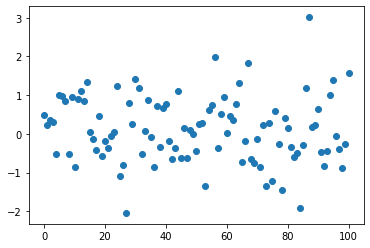

In [63]:
plt.scatter(x,y)
plt.show()

We can also plot curves using the `plot(x,y)` command

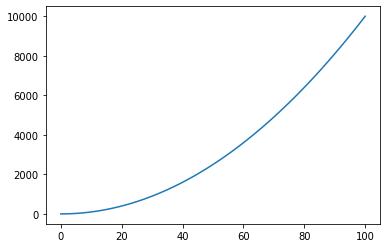

In [64]:
plt.plot(x,x**2)
plt.show()

### Describing the Data

We can add labels and legends to the $x$ and $y$ axes with a simple command:

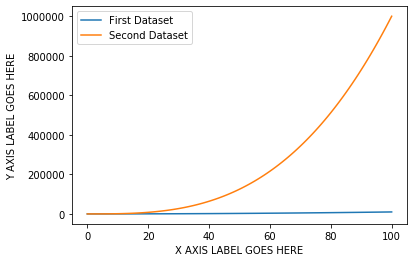

In [65]:
plt.plot(x,x**2)
plt.plot(x,x**3)
plt.xlabel("X AXIS LABEL GOES HERE")
plt.ylabel("Y AXIS LABEL GOES HERE")
plt.legend(["First Dataset", "Second Dataset"])
plt.show()

### Styles

There exists another optional parameter which can be used to customize the color and style of the curve:

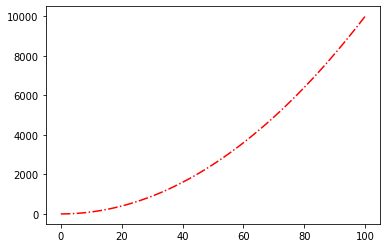

In [66]:
plt.plot(x,x**2,"r-.")
plt.show()

Note that we passed the argument `"r-."` into our formatting parameter; this instructs `pyplot` to set the color to red, and the line style to alternating dots and lines.

The most basic colors available are as follows:

| **Color** | **Alias** |
|---------|------|
| Blue    | `b` |
| Green   | `g` |
| Red     | `r` |
| Cyan    | `c` |
| Magenta | `m` |
| Yellow  | `y` |
| Black   | `k` |
| White   | `w` |

As for the line styles, we have the following available:

| **Style** | **Alias** |
|---------|------|
| Solid    | `-` |
| Dashed   | `--` |
| Dash Dotted     | `-.` |
| Dotted    | `:` |

### 3-D Plots

Plotting in three dimensions requires a bit more effort, but is not too complicated.  The process involves creating a `figure` object and adding a 3-D subplot to the figure.  Calling `scatter` or `plot` from the same object then allows you to compare three datasets!

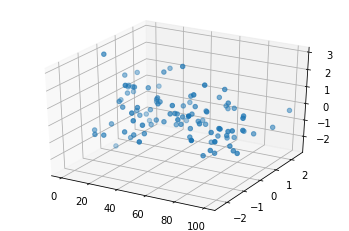

In [67]:
from mpl_toolkits.mplot3d import Axes3D

x = np.arange(0,101,1)
y = np.random.randn(101)
z = np.random.randn(101)

fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(x, y, z)
plt.show()

We see that the same principle can be applied to line plots:

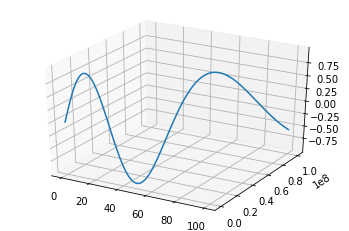

In [68]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.plot(x, x**4, np.sin(0.1*x))
plt.show()

### Contour Plots

Given a set of `meshgrid` points `X` and `Y` and a third equally-shaped set of datapoints, we can create a contour plot:

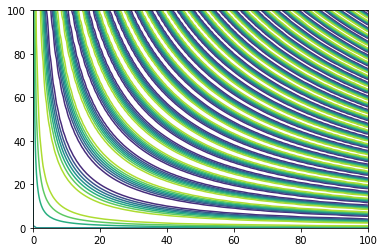

In [69]:
X,Y = np.meshgrid(x,x)
Z = np.sin(0.01*X*Y)

plt.contour(X,Y,Z)
plt.show()

Alternatively, we can create a density plot with `pcolormesh`: 

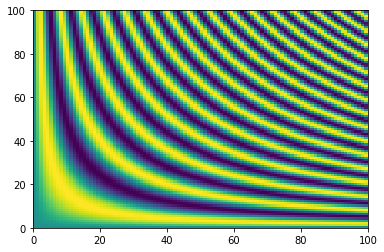

In [70]:
plt.pcolormesh(X,Y,Z)
plt.show()

### Quiver Plots

The next type of plot we will introduce is a great way to visualize vector fields; for this, we need a `meshgrid` as well as two more equally-sized datasets corresponding to vector $x$-magnitude and $y$-magnitude.

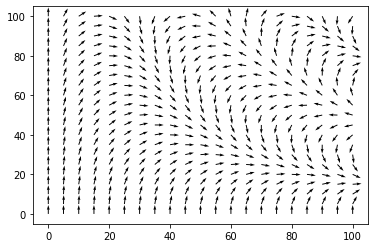

In [77]:
x = np.arange(0,101,5)
X,Y = np.meshgrid(x,x)
X_mag, Y_mag = np.sin(0.001*X*Y), np.cos(0.001*X*Y)

plt.quiver(X,Y,X_mag,Y_mag)
plt.show()

### Stream Plots

The final plot type we will be presenting is a *stream plot*, which can be used as an alternative way to visualize vector fields.

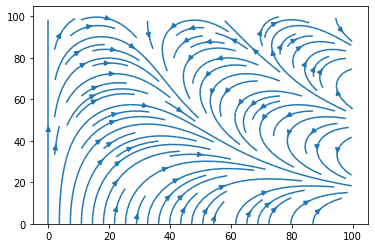

In [76]:
plt.streamplot(X,Y,X_mag,Y_mag)
plt.show()